# What scale of measurement applies to timeseries data? Is timeseries data continuous or discrete? Why?


Numerical scale applies to Timeseries data because Timeseries data consists of dates and numeric values.

Timeseries data can be both continuous or discrete depending on what is being measured or counted. For example, population of a country will be discrete (no half-person), while stock prices will be continuous. if the timeseries consists of values that can be counted, then it will be discrete, but if it consists of values that can be measured, it will be continuous. 

# What does ARIMA stand for? Break down and explain each piece in the name.


ARIMA is a model used in statistics and econometrics to measure events that happen over a period of time. The model is used to understand past data and predict future data in a series. It’s used when a metric is recorded in regular intervals, for example, from fractions of a second to daily, weekly or monthly periods. 

ARIMA can be broken down as: 

AR - Autoregressive (AR) modeling is one of the techniques used for time-series analysis. AR models are a very powerful tool in time series analysis, allowing us to forecast the future based on historical data. AR models can be used to model anything that has some degree of autocorrelation which means that there is a correlation between observations at adjacent time steps. The most common use case for this type of modeling is with stock market prices where the price today (t) is correlated with the price one day ago (t-1).


I - Integrated: represents the differencing of raw observations to allow for the time series to become stationary (i.e., data values are replaced by the difference between the data values and the previous values).

MA - (Moving average) - past and present errors are used to predict future values - impacts of a random short-term fluctuations are decreased.


# Using the data in the temperatures/ folder. Write a function that efficiently converts every column to a different temperature scale: one that is more common than Kelvin.


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
#from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import seaborn as sns

df = pd.read_csv("temperature.csv",parse_dates=True, index_col='datetime')
df


,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,284.610000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868185,291.533501,293.403141,296.608509,285.154558,284.607305,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,284.599918,...,285.756824,288.326940,285.847789,287.231672,307.391513,304.281841,310.411539,304.4,304.4,303.5
2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,284.592530,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-29 20:00:00,NaN,282.000000,NaN,280.820000,293.550000,292.150000,289.540000,294.710000,285.720000,289.560000,...,290.240000,NaN,275.130000,288.080000,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 21:00:00,NaN,282.890000,NaN,281.650000,295.680000,292.740000,290.610000,295.590000,286.450000,290.700000,...,289.240000,NaN,274.130000,286.020000,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 22:00:00,NaN,283.390000,NaN,282.750000,295.960000,292.580000,291.340000,296.250000,286.440000,289.710000,...,286.780000,NaN,273.480000,283.940000,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
# converts Kelvin to Celsius

def temp_change (a):# function for coverts the Kelvin to Celsius
    b = a - 273.15 # code for convert kelvin to celsius 
    
    return b

df2 = df.apply(temp_change)# apply method for applying our code to our df. 
df2.dropna(inplace =True) # Droping NAN
df2


,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 13:00:00,11.480000,8.930000,16.330000,8.650000,18.720000,18.380000,20.260000,23.450000,11.970000,11.460000,...,12.480000,15.070000,12.680000,14.020000,34.440000,32.320000,37.430000,31.250,31.250,30.35
2012-10-01 14:00:00,11.479041,8.933252,16.324993,8.647217,18.718186,18.383501,20.253141,23.458509,12.004558,11.457306,...,12.513208,15.097676,12.684650,14.036092,34.440000,31.160000,37.345769,31.250,31.250,30.35
2012-10-01 15:00:00,11.476998,8.941867,16.310618,8.639833,18.712845,18.393355,20.242177,23.481487,12.083952,11.449918,...,12.606824,15.176940,12.697789,14.081672,34.241513,31.131841,37.261539,31.250,31.250,30.35
2012-10-01 16:00:00,11.474955,8.950481,16.296243,8.632449,18.707503,18.403209,20.231213,23.504466,12.163345,11.442530,...,12.700441,15.256203,12.710929,14.127251,33.995200,31.088015,37.177308,31.250,31.250,30.35
2012-10-01 17:00:00,11.472911,8.959096,16.281869,8.625065,18.702162,18.413063,20.220249,23.527445,12.242738,11.435142,...,12.794057,15.335467,12.724069,14.172831,33.748887,31.044188,37.093077,31.250,31.250,30.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-27 20:00:00,13.290000,20.690000,23.910000,13.000000,26.840000,26.240000,25.280000,29.000000,11.220000,4.110000,...,17.450000,16.830000,9.970000,16.590000,14.428000,22.560000,24.000000,26.403,26.403,22.61
2017-10-27 21:00:00,14.720000,21.700000,25.990000,14.990000,28.170000,26.550000,26.280000,30.500000,12.740000,4.770000,...,17.180000,16.330000,9.970000,15.930000,14.428000,20.000000,25.000000,26.403,26.403,20.00
2017-10-27 22:00:00,15.270000,22.420000,27.410000,16.290000,28.450000,27.010000,27.410000,31.330000,13.250000,4.870000,...,15.340000,14.770000,8.970000,14.940000,14.428000,21.000000,24.000000,26.403,26.403,21.00


# Write a function that efficiently fills in missing values in every column, excluding trailing NANs. That is: if there's temperature data on either side of a timestamp, it should interpolate through it. But if data stopped being collected, your function should leave nans at the end.


In [146]:
def change_NAN(some_df): # function for refilling NANs 
    
     return df.interpolate(method='linear', axis=0, limit_area='inside')# this code will find average of the missing value 

   

    
    
change_NAN(df)

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,284.610000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868185,291.533501,293.403141,296.608509,285.154558,284.607305,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,284.599918,...,285.756824,288.326940,285.847789,287.231672,307.391513,304.281841,310.411539,304.4,304.4,303.5
2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,284.592530,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-29 20:00:00,NaN,282.000000,NaN,280.820000,293.550000,292.150000,289.540000,294.710000,285.720000,289.560000,...,290.240000,NaN,275.130000,288.080000,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 21:00:00,NaN,282.890000,NaN,281.650000,295.680000,292.740000,290.610000,295.590000,286.450000,290.700000,...,289.240000,NaN,274.130000,286.020000,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 22:00:00,NaN,283.390000,NaN,282.750000,295.960000,292.580000,291.340000,296.250000,286.440000,289.710000,...,286.780000,NaN,273.480000,283.940000,NaN,NaN,NaN,NaN,NaN,NaN


# Find all cities A and B where city A is warmer than city B in the summer, but also colder than city B in the winter, on average.


In [302]:

df_summer = df2[((df2.index.month > 5) & (df2.index.month < 9))].mean() # select summer months and find average fot each months

df_summer

df_winter = df2[((df2.index.month < 3) | (df2.index.month == 12))].mean()# select winter months and find average for each months

df_winter

df3 = pd.DataFrame(df_summer).rename(columns={0:'Mean Summer'})# columns name 
df3['City_W'] = df3.index
df3.reset_index(drop=True, inplace = True)

df5 = pd.DataFrame(df_winter).rename(columns={0:'Mean Winter' })# columns name
df5['City'] = df5.index
df5.reset_index(drop=True, inplace = True)
df5

df_concat = pd.concat([df3, df5], axis=1,join = 'inner') # join two dataframe 


In [324]:
city_column = df_concat.pop("City")
df_concat.insert(0, 'City', city_column) # to take City columns to first place 
#df_concat.pop('City_W')

df_concat


,City,Mean Summer,Mean Winter
0,Vancouver,18.121562,3.751695
1,Portland,19.509756,4.512810
2,San Francisco,18.740910,10.689932
3,Seattle,18.192881,4.857002
4,Los Angeles,22.475256,12.661726
5,San Diego,21.092092,12.605730
6,Las Vegas,31.512940,8.079317
7,Phoenix,32.949391,11.980211
8,Albuquerque,22.612343,2.135128
9,Denver,20.735323,-0.506332


In [357]:
found_cities = {'City A': [], # we need empty list A and B
                'City B': []}

found_cities_df = pd.DataFrame(found_cities)# then we need to do empty dataframe 

i = 0
k = 0
while i < (len(df_concat) - 1): # we use while functing, to count our rows we use len.
    j = 0
    while j < (len(df_concat) - 1):# nested while to go and compare cities to each other.
        if (df_concat.loc[i]['Mean Summer'] > df_concat.loc[j+1]['Mean Summer']) and (df_concat.loc[i]['Mean Winter'] < df_concat.loc[j+1]['Mean Winter']):
            found_cities_df.loc[k, ['City A']] = df_concat.loc[i]['City'] # if city's will appropriate to our condition, 
            found_cities_df.loc[k, ['City B']] = df_concat.loc[j+1]['City'] # this code will take city's name and will put,
        j = j + 1                                                           # in City A or City B.
        k = k + 1
    i = i + 1
found_cities_df

,City A,City B
36,Portland,San Francisco
37,Portland,Seattle
211,Las Vegas,San Francisco
213,Las Vegas,Los Angeles
214,Las Vegas,San Diego
...,...,...
1118,Tel Aviv District,Nahariyya
1140,Eilat,Jacksonville
1142,Eilat,Miami
1152,Eilat,Haifa


## For two of the cities you found in question 5 (there are many possible answers), clean up the data via rolling averages and plot a clear visual. Explain how rolling average differs from moving average (MA) model.


In [51]:
## difference between both:  Rolling average is used to smoothen  the past values and remove noise to better understand the trends in the past data while moving average models are used to forecast future values.  


#rolling average for both cities
df['7day_rolling_avg_P'] = df.Portland.rolling(window = 365).mean()
df['7day_rolling_avg_S'] = df.Portland.rolling(window = 365).mean()





<AxesSubplot:xlabel='datetime'>

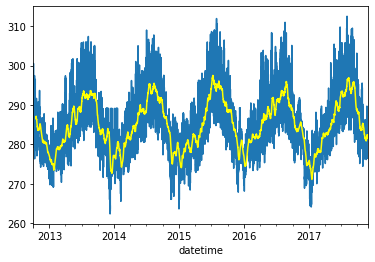

In [50]:
df['Portland'].plot()
df['7day_rolling_avg_P'].plot(c='yellow')

<AxesSubplot:xlabel='datetime'>

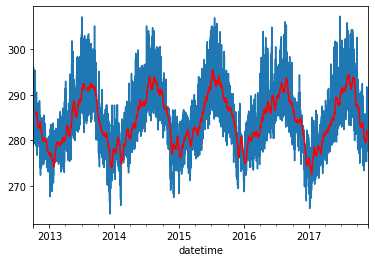

In [47]:
df["Seattle"].plot()
df['7day_rolling_avg_S'].plot(c="red")

# Perform SARIMA on five cities, iterating through the cities programmatically. Explain your results.


# Graph the predicted values 30 days out.


# Explain what you see when you perform results.summary() on the cities in question 7. 

# Bonus:
# What do GARCH and ARCH Stand for? Break down and explain each piece in the names. Explain the difference between the two. Create a GARCH and ARCH model on the same 5 cities from question 6. Explain and graph the results.